# Importing libraries and guetting access to drive

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.metrics import confusion_matrix
import random
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading dataset

In [ ]:
def load_data(data_path):

  with open(data_path, 'r') as fp:
    data = json.load(fp)
  X = np.array(data["features"])
  Y = np.array(data["labels"])

  return X, Y

In [ ]:
data_path = '/content/drive/MyDrive/Dataset2.json'

In [ ]:
X, Y = load_data(data_path)

In [ ]:
X.shape

(947, 30, 39)

In [ ]:
Testset_path = '/content/drive/MyDrive/Test.json'

In [ ]:
X_test, Y_test = load_data(Testset_path)

In [ ]:
X_test.shape

(36, 30, 39)

# Normalizing the data

In [ ]:
X_test, _, Y_test, _ = train_test_split(X_test, Y_test, test_size=0.05, random_state=7,shuffle=True)

In [ ]:
X_test.shape

(34, 30, 45)

# Creating train, validation and test sets

In [ ]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=7, shuffle=True)

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])

In [ ]:
X_train.shape

(757, 30, 39)

# Building the model

In [ ]:
def build_model(input_shape):
  model = keras.Sequential()

  model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
  model.add(keras.layers.LSTM(64))

  model.add(keras.layers.Dense(256, activation='relu'))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Dense(1, activation='sigmoid'))

  return model


In [ ]:
model = build_model(input_shape)
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.summary()

history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), batch_size=32, epochs=100, callbacks=[early_stopping])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 64)            26624     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 76545 (299.00 KB)
Trainable params: 76545 (299.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
24/2

# Plotting the history

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

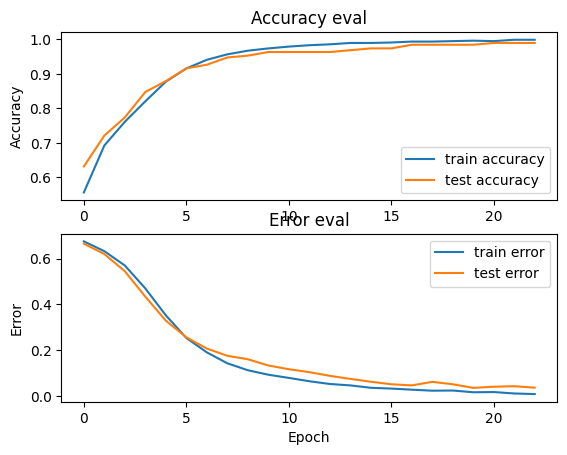

In [ ]:
plot_history(history)

In [ ]:
# Evaluate on train set
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate on test set
validation_loss, validation_accuracy = model.evaluate(X_validation, Y_validation, verbose=0)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

Train Accuracy: 99.60%
Validation Accuracy: 98.42%


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print('\nTest accuracy:', test_acc)

2/2 [==============================] - 0s 15ms/step - loss: 1.6712 - accuracy: 0.5833

Test accuracy: 0.5833333134651184


In [ ]:
Y_predict = model.predict(X_test)

2/2 [==============================] - 1s 13ms/step


In [ ]:
threshold = 0.5  # Set your threshold here (can be adjusted based on your requirements)

# Convert probabilities to class labels based on the threshold
predicted_labels = (Y_predict > threshold).astype(int)

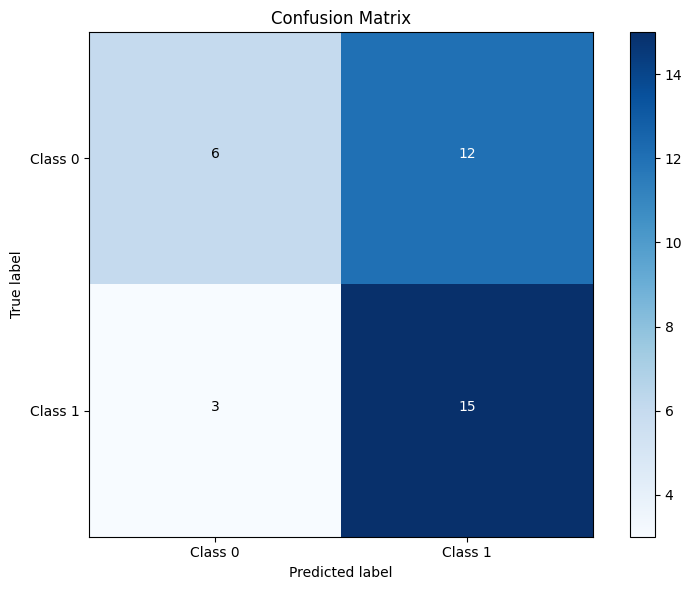

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test, predicted_labels)

# Create a figure and plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Replace with your class labels if needed
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Test 2

In [ ]:
Testset_path2 = '/content/drive/MyDrive/Test2.json'

In [ ]:
X_test2, Y_test2 = load_data(Testset_path2)

In [ ]:
X_test2.shape

(26, 30, 39)

In [ ]:
X_test2, _, Y_test2, _ = train_test_split(X_test2, Y_test2, test_size=0.05, random_state=7,shuffle=True)

In [ ]:
X_test2.shape

(24, 30, 39)

In [ ]:
test_loss2, test_acc2 = model.evaluate(X_test2, Y_test2, verbose=1)
print('\nTest accuracy:', test_acc2)

1/1 [==============================] - 0s 35ms/step - loss: 1.3277 - accuracy: 0.6250

Test accuracy: 0.625


In [ ]:
Y_predict2 = model.predict(X_test2)

1/1 [==============================] - 0s 49ms/step


In [ ]:
threshold = 0.5  # Set your threshold here (can be adjusted based on your requirements)

# Convert probabilities to class labels based on the threshold
predicted_labels2 = (Y_predict2 > threshold).astype(int)

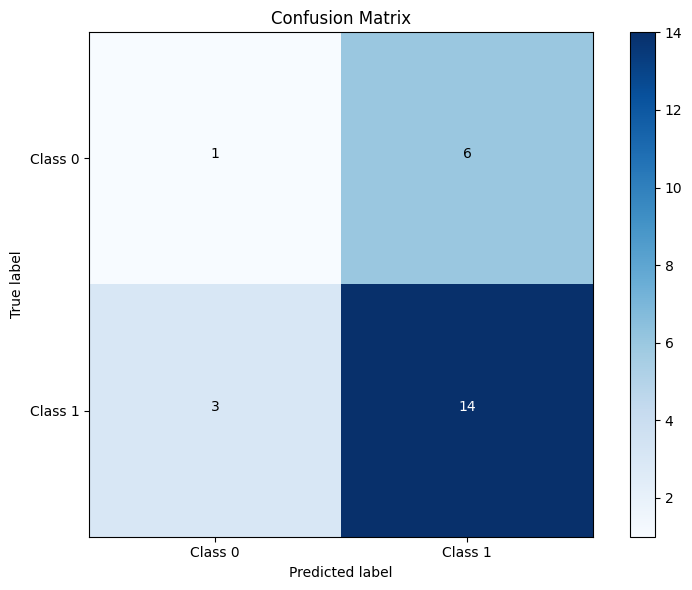

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(Y_test2, predicted_labels2)

# Create a figure and plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Replace with your class labels if needed
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()